### 多因子房价预测

> csv表格数据

![](./img/5_img/1.png)

> 任务：
>
> 基于csv数据，建立线性回归模型，预测合理房价。
>
> 1. 以面积为输入，建立单因子模型，评估模型表现，可视化线性回归结果。
>
> 2. 以 _Income,House Age,Number of Rooms,Population,size_ 为输入变量，建立多因子模型，评估模型表现。
>
> 3. 预测 _Income = 65000, House Age = 5, Number of Rooms = 5, Population = 30000, size = 200_的合理房价
>

In [8]:
# load the data
import pandas as pd
import numpy as np

data = pd.read_csv('5_1_房屋信息与价格.csv')
data.head()

,Income,House Age,Number of Rooms,Population,size,Price
0,79545,5.3,7,23087,188,1059034
1,79249,5.0,7,40173,160,1505891
2,61287,5.1,9,36882,227,1058988
3,63345,3.8,6,34310,165,1260617
4,59982,6.0,8,26354,162,630943


> 以下是可视化

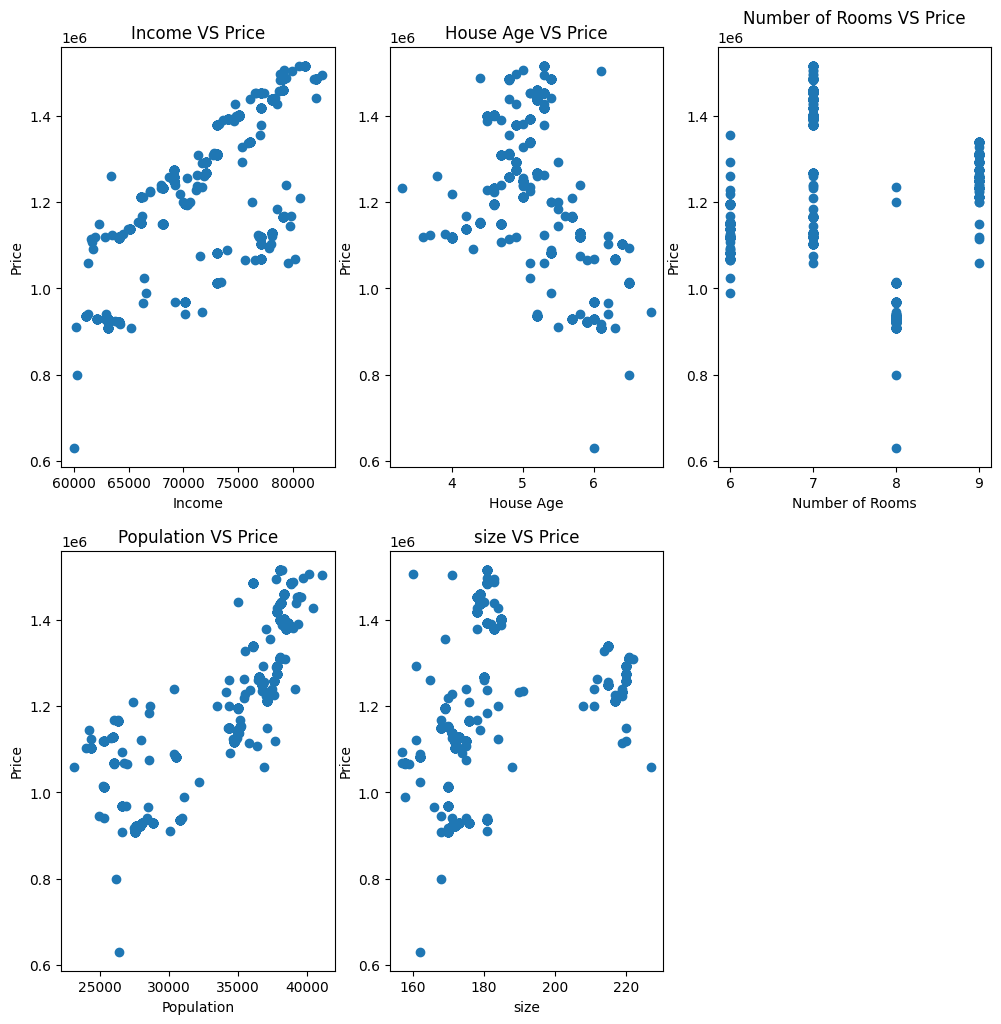

In [13]:
# 让 Matplotlib 绘制的图形直接嵌入在 Notebook 的单元格输出中，而不是弹出单独的窗口显示图像。
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))

fig1 = plt.subplot(231) # 两行三列第一个
plt.scatter(data.loc[:, 'Income'], data.loc[:, 'Price'])
plt.xlabel('Income')
plt.ylabel('Price')
plt.title('Income VS Price')

fig2 = plt.subplot(232) # 两行三列第二个
plt.scatter(data.loc[:, 'House Age'], data.loc[:, 'Price'])
plt.xlabel('House Age')
plt.ylabel('Price')
plt.title('House Age VS Price')

fig1 = plt.subplot(233) # 两行三列第三个
plt.scatter(data.loc[:, 'Number of Rooms'], data.loc[:, 'Price'])
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Number of Rooms VS Price')

fig2 = plt.subplot(234)
plt.scatter(data.loc[:, 'Population'], data.loc[:, 'Price'])
plt.xlabel('Population')
plt.ylabel('Price')
plt.title('Population VS Price')

fig1 = plt.subplot(235) 
plt.scatter(data.loc[:, 'size'], data.loc[:, 'Price'])
plt.xlabel('size')
plt.ylabel('Price')
plt.title('size VS Price')

plt.show()

> 可视化完成后，开始任务1：输入面积观察模型线性结果

In [17]:
# Define X and Y
X = data.loc[:, 'size']
Y = data.loc[:, 'Price']

X.head()

0    188
1    160
2    227
3    165
4    162
Name: size, dtype: int64

In [18]:
Y.head()


0    1059034
1    1505891
2    1058988
3    1260617
4     630943
Name: Price, dtype: int64

> 建立单因子模型

In [22]:
# set up the linear regression model
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression() # create the model

# 转换数据维度(二维)
X = np.array(X).reshape(-1, 1)
Y = np.array(Y).reshape(-1, 1)

print(X.shape, Y.shape) # (数据数量，二维)

LR1.fit(X, Y) # 训练model

(967, 1) (967, 1)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [60]:
# 开始预测
Y_pred_1 = LR1.predict(X)
print(Y_pred_1[0:5]) # 打印前5个预测值

[[1226245.09314898]
 [1135056.22856116]
 [1353258.15453916]
 [1151339.95438042]
 [1141569.71888886]]


> #### 评估

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
mse_score_1 = mean_squared_error(Y, Y_pred_1)
r2_score_1 = r2_score(Y, Y_pred_1)
print('MSE:', mse_score_1)
print('R2:', r2_score_1)

MSE: 28529376915.38021
R2: 0.11563815765416074


> 因为数据量很大，所以 R2 展示的效果不是很好，接下来看看预测与实际的可视化效果图

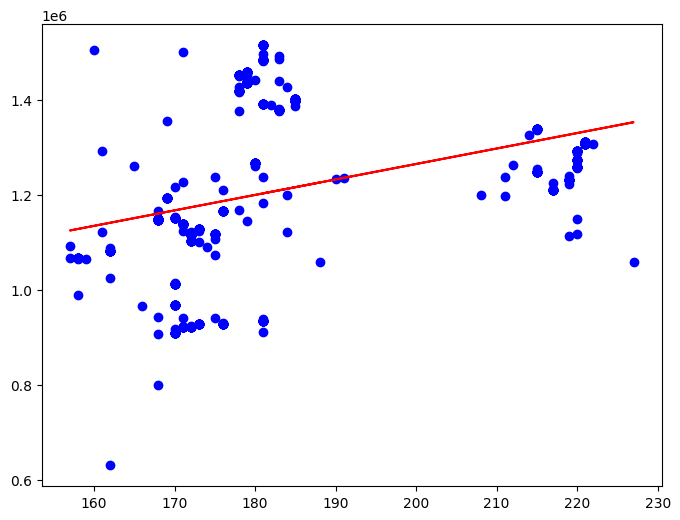

In [30]:
fig6 = plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred_1, color='r', label='Predicted Line')

plt.show()

> 可以发现单因子很难评估，效果不好，需要考虑其他因素

> 这里开始建立多因子模型，然后评估，最后可视化

In [ ]:
# define X_multi
X_multi = data.drop('Price', axis=1)  # drop the Price column
X_multi[] # 多因子的输入

,Income,House Age,Number of Rooms,Population,size
0,79545,5.3,7,23087,188
1,79249,5.0,7,40173,160
2,61287,5.1,9,36882,227
3,63345,3.8,6,34310,165
4,59982,6.0,8,26354,162
...,...,...,...,...,...
962,73111,4.9,7,38511,183
963,76111,5.1,9,36111,215
964,62111,5.7,8,28811,176
965,78111,5.2,7,38011,179


In [35]:
# set up the model
LR_multi = LinearRegression() # create the model
# train the model
LR_multi.fit(X_multi, Y) # 训练model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
# make predictions
Y_pred_multi = LR_multi.predict(X_multi) # 多因子输入
print(Y_pred_multi[0:5]) # 打印前5个预测值

[[1080927.88142871]
 [1532395.21686265]
 [1079406.94703682]
 [1093232.54739636]
 [ 817635.14914869]]


In [41]:
mse_score_multi = mean_squared_error(Y, Y_pred_multi)
R2_score_multi = r2_score(Y, Y_pred_multi)
print('MSE:', mse_score_multi)
print('R2:', R2_score_multi)

MSE: 544022448.5550916
R2: 0.9831362354562218


> 可以发现 R2 从 0.1 变成了 0.91 ，效果变化的很好

In [43]:
# 原来的 MSE
print('Original MSE:', mse_score_1)

Original MSE: 28529376915.38021


> 绘图观察效果

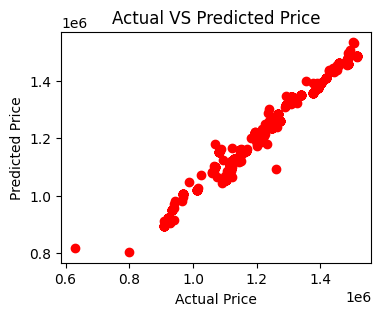

In [48]:
# 多因子 mluti
fig7 = plt.figure(figsize=(4, 3))
plt.scatter(Y, Y_pred_multi, color='r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual VS Predicted Price')
plt.show()

> 可以发现基本能够对应上，效果还是不错的

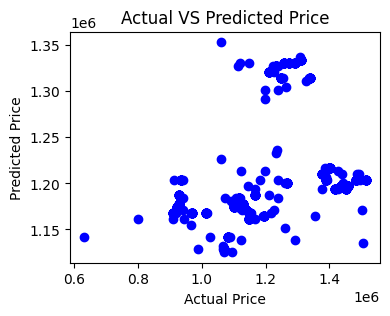

In [47]:
# 单因子
fig8 = plt.figure(figsize=(4, 3))
plt.scatter(Y, Y_pred_1, color='b')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual VS Predicted Price')
plt.show()

> 可以发现单因子的比较分散，且基本预测和实际基本不能对应上

> 最后一个任务：预测 _Income = 65000, House Age = 5, Number of Rooms = 5, Population = 30000, size = 200_的合理房价

In [54]:
X_test_multi = [65000, 5, 5, 30000, 200] # Income, House Age, Number of Rooms, Population, size
X_test_multi = np.array(X_test).reshape(1, -1)
print(X_test_multi)

[[65000     5     5 30000   200]]


In [57]:
Y_test_pred = LR_multi.predict(X_test_multi)
print("Predicted Price for the test input:", Y_test_pred)
# 警告不影响输出结果

Predicted Price for the test input: [[943838.58142764]]


f:\Anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [59]:
import warnings #忽略命名警告
warnings.filterwarnings("ignore", category=UserWarning)

Y_test_pred = LR_multi.predict(X_test_multi)
print("Predicted Price for the test input:", Y_test_pred)

Predicted Price for the test input: [[943838.58142764]]


> 小结：
>
> ![](./img/5_img/2.png)